In [8]:
import cv2 as cv
from os import listdir
import matplotlib.pyplot as plt
import numpy as np

In [9]:
output = "C:/Users/Artem/bboxed_barcodes_dataset/"
input = "C:/Users/Artem/yolo_barcode_dataset/"
folders = ["Training/", "Validation/", "Testing/"]

In [10]:
def erase_bboxes(image, labels, bboxes_out, labels_out):
    height, width, _ = image.shape
    for i in range(len(labels)):
        class_label = int(labels[i][0])
        x = [int(labels[i][j*2+1]*width) for j in range(int(len(labels[i])/2))]
        y = [int(labels[i][j*2+2]*height) for j in range(int(len(labels[i])/2))]
        
        left, top, right, bottom = min(x), min(y), max(x), max(y)
        
        left_stride, top_stride, right_stride, bottom_stride = int(np.random.uniform(0.5, 1.5)*(right-left)), int(np.random.uniform(0.5, 1.5)*(bottom-top)), int(np.random.uniform(0.5, 1.5)*(right-left)), int(np.random.uniform(0.5, 1.5)*(bottom-top))
        
        left_bbox, top_bbox, right_bbox, bottom_bbox = left - left_stride if left - left_stride >= 0 else 0, top - top_stride if top - top_stride >= 0 else 0, right + right_stride if right + right_stride < width else width-1, bottom + bottom_stride if bottom + bottom_stride < height else height-1

        x_new, y_new = [x[j] - left_bbox for j in range(len(x))], [y[j] - top_bbox for j in range(len(y))]

        cv.imwrite(bboxes_out[:-4]+str(i)+".jpg", image[top_bbox:bottom_bbox,left_bbox:right_bbox,:])

        with open(labels_out[:-4]+str(i)+".txt", 'w') as fout:
            fout.write(f"{class_label} ")
            for j in range(len(x_new)):
                fout.write(f"{x_new[j]/(right_bbox-left_bbox)} {y_new[j]/(bottom_bbox-top_bbox)} ")
            fout.write('\n')

In [11]:
for folder in folders:
    images_raw = listdir(input+folder+"images/")
    labels = [input+folder+"labels/"+images_raw[i][:-3]+"txt" for i in range(len(images_raw))]
    images = [input + folder + "images/" + images_raw[i] for i in range(len(images_raw))]

    for i in range(len(images)):
        image = cv.imread(images[i])
        label_str = []
        
        with open(labels[i], 'r') as fin:
            for l in fin:
                label_str.append(l[:-3].split(' '))
                
        label = [[float(label_str[k][j]) for j in range(len(label_str[k]))] for k in range(len(label_str))]

        erase_bboxes(image, label, output+folder+"images/"+images_raw[i], output+folder+"labels/"+images_raw[i][:-3]+"txt")

[682.0, 466.0, 389.0, 379.0, 359.0, 359.0, 364.0, 518.0, 620.0, 615.0, 635.0, 625.0, 625.0, 625.0] [1560.0, 1545.0, 1404.0, 1175.0, 962.0, 830.0, 729.0, 751.0, 751.0, 858.0, 972.0, 1128.0, 1277.0, 1412.9999999999998] (2481, 1050, 3)


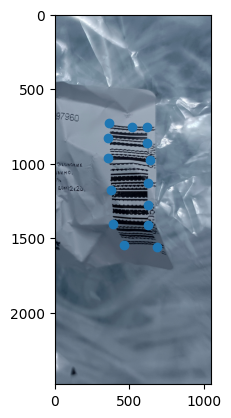

In [12]:
# just check that labeling is ok

import matplotlib.pyplot as plt

img = cv.imread("C:/Users/Artem/bboxed_barcodes_dataset/Validation/images/IMG_20240222_220236_7950.jpg")
height, width, _ = img.shape

with open("C:/Users/Artem/bboxed_barcodes_dataset/Validation/labels/IMG_20240222_220236_7950.txt", 'r') as fin:
    data = fin.readline().split(' ')[1:-1]
    x = [float(data[i*2])*width for i in range(int(len(data)/2))]
    y = [float(data[i*2+1])*height for i in range(int(len(data)/2))]

print(x, y, img.shape)

plt.imshow(img)
plt.scatter(x, y)
plt.show()